# Data Preparation
** Authors **: Rafaella and Luca

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Loading the dataset
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Recommender/train.csv")


import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

## Datatype Conversion and Missing Values handling

In [2]:
data.isnull().sum() # no NAs

# Converting to datatypes
data['ts_listen'] = pd.to_datetime(data['ts_listen'], unit='s')
data['artist_id'] = data['artist_id'].astype('category')
data['media_id'] = data['media_id'].astype('category')
data['genre_id'] = data['genre_id'].astype('category')
data['user_gender'] = data['user_gender'].astype('bool')
data['is_listened'] = data['is_listened'].astype('bool')
data['album_id'] = data['album_id'].astype('category')
data['context_type'] = data['context_type'].astype('category')
data['platform_name'] = data['platform_name'].astype('category')
data['release_date'] = pd.to_datetime(data['release_date'], format='%Y%m%d', errors='coerce')
data['listen_type'] = data['listen_type'].astype('category')
data['platform_family'] = data['platform_family'].astype('category')
data['user_id'] = data['user_id'].astype('category')

print(data.dtypes)

genre_id                 category
ts_listen          datetime64[ns]
media_id                 category
album_id                 category
context_type             category
release_date       datetime64[ns]
platform_name            category
platform_family          category
media_duration              int64
listen_type              category
user_gender                  bool
user_id                  category
artist_id                category
user_age                    int64
is_listened                  bool
dtype: object


In [3]:
data = data.dropna(subset=['release_date'])

# EDA

In [1]:
# Anzahl unterschiedlicher user_id und media_id
num_unique_users = data['user_id'].nunique()
num_unique_media = data['media_id'].nunique()

# Durchschnittliche Anzahl unterschiedlicher Medien pro Nutzer
mean_media_per_user = data.groupby('user_id')['media_id'].nunique().mean()
# Durchschnittliche Anzahl unterschiedlicher Nutzer pro Medium
mean_users_per_media = data.groupby('media_id')['user_id'].nunique().mean()

# Ergebnisse ausgeben
print(f"Anzahl unterschiedlicher user_id: {num_unique_users}")
print(f"Anzahl unterschiedlicher media_id: {num_unique_media}")
print(f"Durchschnittliche Anzahl unterschiedlicher media_id pro user_id: {mean_media_per_user:.2f}")
print(f"Durchschnittliche Anzahl unterschiedlicher user_id pro media_id: {mean_users_per_media:.2f}")

NameError: name 'data' is not defined

## Outlier Removal
### Numerical data
This subchapter shows how outliers were identified and removed using one of the outlier removal methods called IQR.

In [4]:
# Remove outliers using the IQR method
def remove_outliers(df, col):
    q_1 = df[col].quantile(0.25)
    q_3 = df[col].quantile(0.75)
    IQR = q_3 - q_1
    lower_bound = q_1 - 1.5 * IQR
    upper_bound = q_3 + 1.5 * IQR
    print(f"Removing outliers from {col} with lower boundary of {lower_bound} and upper boundary of {upper_bound}")
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

Removing outliers from media_duration with lower boundary of 109.0 and upper boundary of 341.0


{'whiskers': [<matplotlib.lines.Line2D at 0x20cfebbea20>,
 'caps': [<matplotlib.lines.Line2D at 0x20cfebbf050>,
 'boxes': [<matplotlib.lines.Line2D at 0x20cfebbe6c0>],
 'medians': [<matplotlib.lines.Line2D at 0x20cfebbf6b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20cfebbf9e0>],
 'means': []}

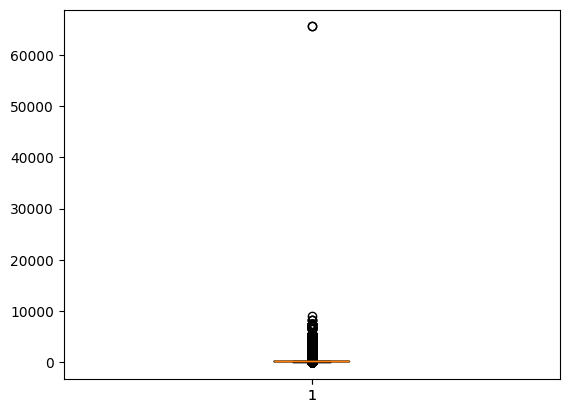

In [5]:
import matplotlib.pyplot as plt
plt.boxplot(data['media_duration']) # quite a few songs that seem to last for hours or even days. Let's remove them.

data = remove_outliers(data,'media_duration')

When analyzing ts_listen, it was shown that most of the timestamps were after 2016 while less than one thousand songs were listened before 2016. Therefore, it has been decided to remove outliers.

ts_listen
1970-12-31        237
1973-12-31          0
1976-12-31          0
1979-12-31          0
1982-12-31        379
1985-12-31          0
1988-12-31          0
1991-12-31          0
1994-12-31          0
1997-12-31          1
2000-12-31          0
2003-12-31          2
2006-12-31          0
2009-12-31        108
2012-12-31         12
2015-12-31         48
2018-12-31    7151901
Freq: 3YE-DEC, dtype: int64
Removing outliers from ts_listen with lower boundary of 2016-10-15 13:10:32.375000320 and upper boundary of 2016-12-13 21:35:53.374999808


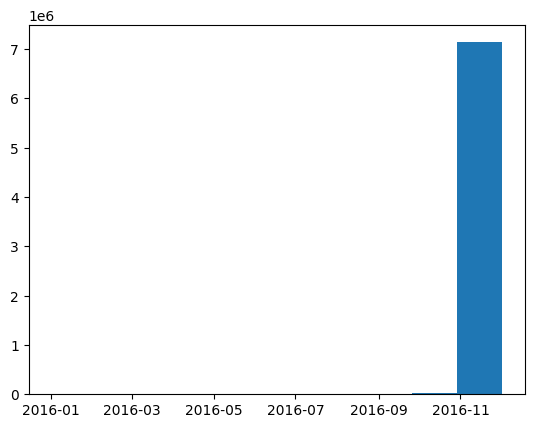

In [6]:
# Grouping by 5-year intervals to see the approximate counts
grouped_data = data.groupby(pd.Grouper(key='ts_listen', freq='3YE')).size()
print(grouped_data) # We can start at 2016

len(data[data['ts_listen'] < pd.Timestamp('2015-12-31')])

tmp = data[data['ts_listen'] > pd.Timestamp('2015-12-31')]
plt.hist(tmp['ts_listen'])

# outlier removal
data = remove_outliers(data,'ts_listen')

(array([5.40000e+01, 1.21000e+02, 3.70000e+02, 7.58000e+02, 9.34000e+02,
        9.97000e+02, 1.38700e+03, 1.29000e+03, 1.78700e+03, 2.02100e+03,
        2.73500e+03, 4.90800e+03, 5.19500e+03, 3.65690e+04, 3.24259e+05,
        3.85581e+05, 4.01821e+05, 3.85558e+05, 2.77370e+05, 2.81870e+05,
        3.18830e+05, 3.33942e+05, 3.66025e+05, 3.00396e+05, 2.19057e+05,
        2.76626e+05, 2.85963e+05, 3.13078e+05, 2.96868e+05, 2.54893e+05,
        2.00035e+05, 2.51509e+05, 2.62013e+05, 2.52500e+05, 2.35281e+05,
        2.04819e+05, 1.85820e+05, 1.97627e+05, 1.88008e+05, 9.11160e+04]),
 array([17089.58644676, 17090.77150926, 17091.95657176, 17093.14163426,
        17094.32669676, 17095.51175926, 17096.69682176, 17097.88188426,
        17099.06694676, 17100.25200926, 17101.43707176, 17102.62213426,
        17103.80719676, 17104.99225926, 17106.17732176, 17107.36238426,
        17108.54744676, 17109.73250926, 17110.91757176, 17112.10263426,
        17113.28769676, 17114.47275926, 17115.65782176

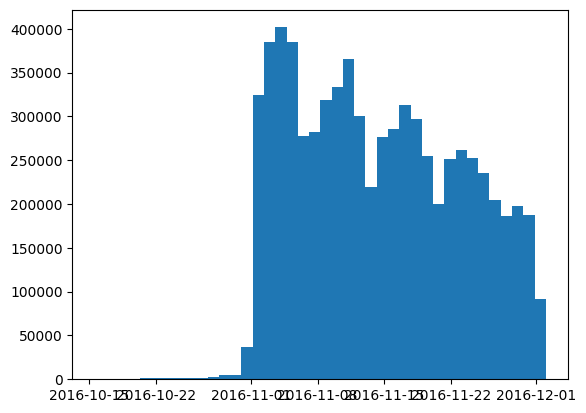

In [7]:
# After outlier removal
plt.hist(data['ts_listen'], bins=40)

{'whiskers': [<matplotlib.lines.Line2D at 0x20cfef54e30>,
 'caps': [<matplotlib.lines.Line2D at 0x20cfef553a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20cfedaaf60>],
 'medians': [<matplotlib.lines.Line2D at 0x20cfef559a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20cfef55c70>],
 'means': []}

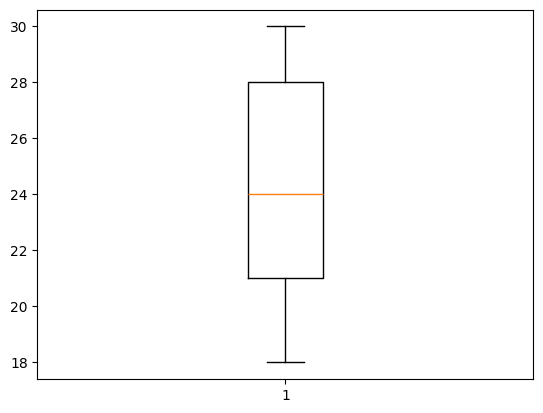

In [8]:
plt.boxplot(data['user_age']) # no outliers here. Ages between 18 and 30

# Sampling
Due to performance issues, it was not possible to perform complex calculations. therefore, it has been decided to only use a subset of the given data. 
In this case, we want to keep the distribution in respect to the usage of users.

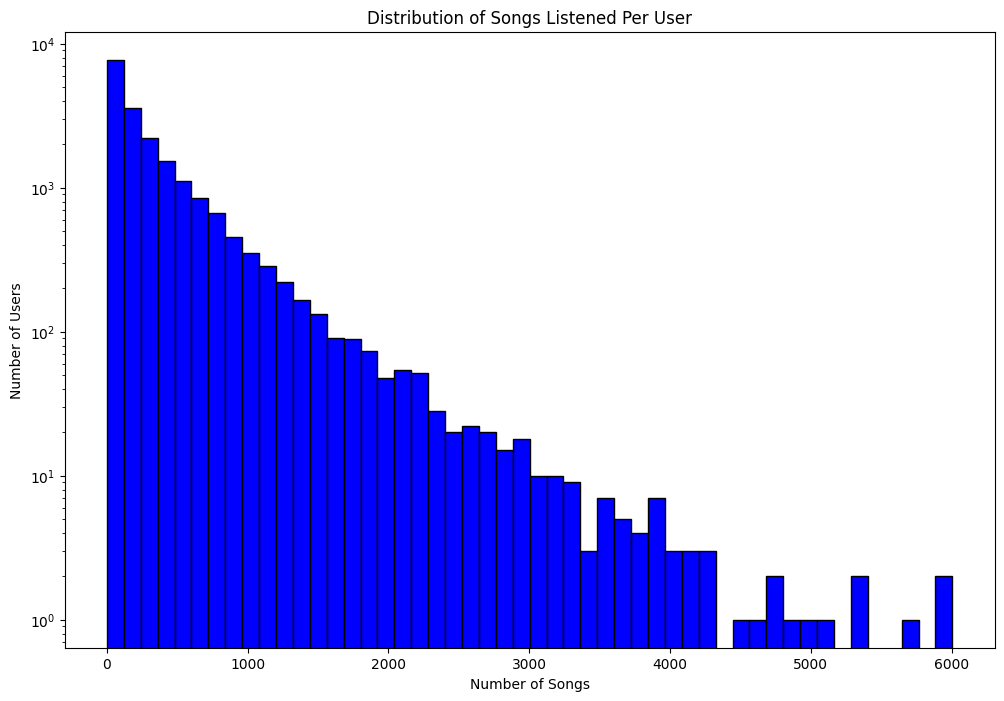

In [9]:
user_song_counts = data.groupby('user_id')['media_id'].count()

# Create the histogram
plt.figure(figsize=(12, 8))
plt.hist(user_song_counts, bins=50, color='blue', edgecolor='black')
plt.yscale('log') 
plt.title('Distribution of Songs Listened Per User')
plt.xlabel('Number of Songs')
plt.ylabel('Number of Users')
plt.show()

In [39]:
user_song_counts.describe()

count    19918.000000
mean       358.971332
std        480.852396
min          0.000000
25%         62.000000
50%        186.000000
75%        468.000000
max       6006.000000
Name: media_id, dtype: float64

In [46]:
import pandas as pd

# Calculate the total number of songs each user has listened to
user_song_counts = data.groupby('user_id')['media_id'].count()

# Bin these counts into categories
bins = [0, 60, 190, 500, float('inf')]  # 25th, 50th, 75th percentile
labels = ['low', 'medium', 'high', 'very high']
data['activity_level'] = pd.cut(user_song_counts, bins=bins, labels=labels, right=False)

# Join this back to the main dataset
data = data.join(data['user_id'].map(data['activity_level']), on='user_id', rsuffix='_r')

# Perform stratified sampling
sampled_data = data.groupby('activity_level', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=42))


In [48]:
# Calculate proportions of each activity level in the ORIGINAL data
original_proportions = data['activity_level'].value_counts(normalize=True)
print("Original Data Proportions:\n", original_proportions)

# Calculate proportions of each activity level in the SAMPLED data
sample_proportions = sampled_data['activity_level'].value_counts(normalize=True)
print("Sampled Data Proportions:\n", sample_proportions)


Original Data Proportions:
 activity_level
medium       0.281029
high         0.275215
very high    0.245818
low          0.197938
Name: proportion, dtype: float64
Sampled Data Proportions:
 activity_level
medium       0.281053
high         0.275295
very high    0.245681
low          0.197971
Name: proportion, dtype: float64


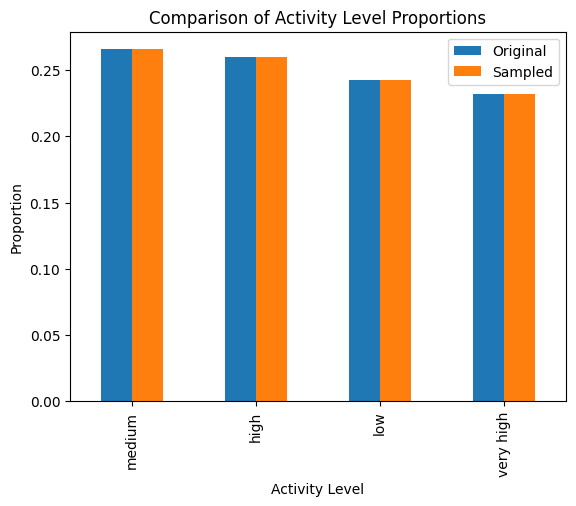

In [45]:
import matplotlib.pyplot as plt

# Create a DataFrame to hold the proportions
comparison_df = pd.DataFrame({
    'Original': original_proportions,
    'Sampled': sample_proportions
})

comparison_df.plot(kind='bar')
plt.title('Comparison of Activity Level Proportions')
plt.ylabel('Proportion')
plt.xlabel('Activity Level')
plt.show()


# Dimension Reduction
For many features such as genre_id, artist_id, etc. there are several thousand unique values. Therefore, to not stretch our matrices unnecessarily and remove complexity, it has been decided to use minimum thresholds for specific categories which will reduce dimensions.

In [ ]:
# TODO

# Feature Engineering

In [ ]:
# Feature Engineering
sampled_data["genre_popularity"] = sampled_data.groupby('genre_id')['genre_id'].transform('count')
sampled_data["media_popularity"] = sampled_data.groupby('media_id')['media_id'].transform('count')
sampled_data["artist_popularity"] = sampled_data.groupby('artist_id')['artist_id'].transform('count')
sampled_data["album_popularity"] = sampled_data.groupby('album_id')['album_id'].transform('count')
sampled_data['songs_listened'] = sampled_data.groupby('user_id')['media_id'].transform('count')

user_top_artist = sampled_data.groupby(['user_id', 'artist_id']).size().groupby(level=0).idxmax().apply(lambda x: x[1])
data['user_top_artist'] = sampled_data['user_id'].map(user_top_artist)

user_top_song = sampled_data.groupby(['user_id', 'media_id']).size().groupby(level=0).idxmax().apply(lambda x: x[1])
sampled_data['user_top_song'] = sampled_data['user_id'].map(user_top_song)

user_top_genre = sampled_data.groupby(['user_id', 'genre_id']).size().groupby(level=0).idxmax().apply(lambda x: x[1])
sampled_data['user_top_genre'] = sampled_data['user_id'].map(user_top_genre)